# Automatización de un informe de Excel a partir de una archivo csv

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlwings as xw
import openpyxl


In [153]:
def pegar_valor_celda(excel, hoja, fila, columna, valor):
    excel.sheets[hoja].range(fila, columna).value = valor


In [154]:
df = pd.read_csv('Datos\data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [155]:
df.dropna(inplace=True)
df


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [156]:
df_describe = df.describe()
df_describe


,Duration,Pulse,Maxpulse,Calories
count,164.000000,164.000000,164.00000,164.000000
mean,64.146341,107.676829,134.27439,375.790244
std,42.888820,14.637516,16.58306,266.379919
min,15.000000,80.000000,100.00000,50.300000
25%,45.000000,100.000000,124.00000,250.925000
50%,60.000000,105.500000,131.00000,318.600000
75%,60.000000,111.000000,143.00000,387.600000
max,300.000000,159.000000,184.00000,1860.400000


In [157]:
# xlwings literalmente abre el archivo
wb = xw.Book('Reportes/Informe.xlsx')
# Evita mostrar la actualizacion del archivo cada vez que se hace
wb.app.screen_updating = False
# Para hacer el archivo invisible
wb.app.visible = False


In [158]:
# Limpia la hoja
wb.sheets["Hoja1"].clear_contents()
pegar_valor_celda(wb, "Hoja1", 1, 1, df.columns.tolist())
pegar_valor_celda(wb, "Hoja1", 2, 1, df.values)
pegar_valor_celda(wb, "Hoja1", 1, 6, df_describe)
wb.save()
wb.close()


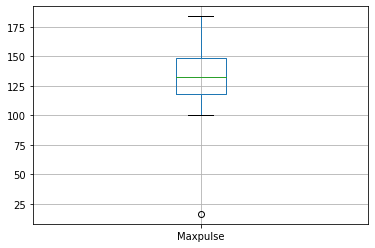

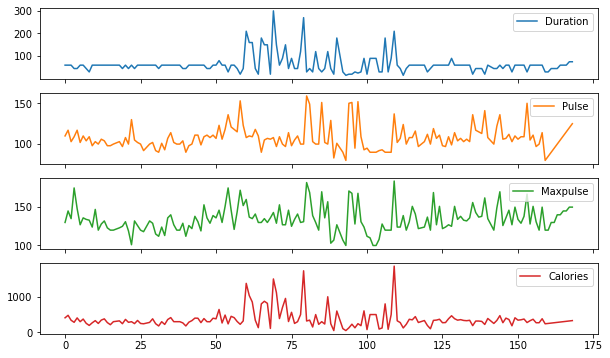

In [159]:
# Generando las imagenes
df_describe.boxplot('Maxpulse')
plt.savefig('Imagenes/boxplot4.jpeg')
plt.show()


df.plot(figsize=(10, 6), subplots=True)
plt.savefig('Imagenes/plot.jpeg')
plt.show()


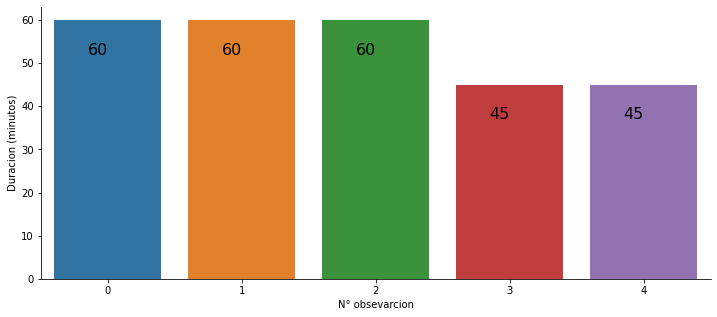

In [166]:
# Ajusta el tamaño del grafico
plt.figure(figsize=(12, 5))

# Muestra el grafico (primera opcion)
# plt.bar(indice, duration, edgecolor='black', color='xkcd:light gray blue')

# Muestra el grafico (segunda opcion)
sns.barplot(
    x=df.head().index,
    y=df.Duration.head()
)

# Agrega etiqueta a cada barra
for i, g in enumerate(df.Duration.head()):
    # "s" es el str que se quiere mostrar
    plt.text(x=i-0.15, y=g-8, s=f'{g}', color='black', fontsize=16)

# Agrega una leyenda en el eje x
plt.xlabel('N° obsevarcion')

# Agrega una leyenda en el eje y
plt.ylabel('Duracion (minutos)')
sns.despine()

# Guarda la imagen en formato jpeg
plt.savefig('Imagenes/barr.jpeg')


In [162]:
# Lectura del archivo (a diferencia de Xlwings)
wb_openpyxl = openpyxl.load_workbook('Reportes/Informe.xlsx')


In [163]:
# # Lee la hoja 'Gráficos' 
ws = wb_openpyxl.get_sheet_by_name('Gráficos')

# # Borra hoja
# wb.remove_sheet(ws)

# Crea la hoja "Gráficos"
# ws = wb_openpyxl.create_sheet('Gráficos')


C:\Users\usuario\AppData\Local\Temp/ipykernel_12032/3835314586.py:2: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  ws = wb_openpyxl.get_sheet_by_name('Gráficos')


In [164]:
# Agregando las imagenes a la hoja Gráficos
img = openpyxl.drawing.image.Image('Imagenes/boxplot4.jpeg')
img.anchor = 'B2'
ws.add_image(img)

img = openpyxl.drawing.image.Image('Imagenes/plot.jpeg')
img.anchor = 'I2'
ws.add_image(img)

img = openpyxl.drawing.image.Image('Imagenes/barr.jpeg')
img.anchor = 'B27'
ws.add_image(img)

wb_openpyxl.save('Reportes/Informe.xlsx')

